# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express is an online news platform that  aims to expand its business by acquiring new subscribers. 

The problem statement: 
The executives of E-news express are concerned that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough to keep customers engaged long enough to decide to subscribe.

Based on this problem, the design team of the company has created a new landing page.

The objective is to test the effectiveness of the new landing page in gathering new subscribers for the news portal by answering these following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations
%matplotlib inline
import scipy.stats as stats #for various statistics calculations1q 

## Reading the Data into a DataFrame

In [2]:
df=pd.read_csv('abtest.csv')
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
#Viewing the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
#viewing the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
#Checking the shape of the data
df.shape
print('There are',df.shape[0],'rows and',df.shape[1],'columns in the data set')

There are 100 rows and 6 columns in the data set


In [6]:
#describing the statistical variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations: From the descriptive table above, we can see all the statistical variables of the data set. This is mainly useful for the numerical variables. The average time spent on both landing pages is 5.38 minutes. the minimum time is 19 seconds and the maximum time is 10.7 minutes.
Also, from the table, we see that more people were converted than not and the most preferred language is Spanish.

In [7]:
#Checking for any duplicated data in the dataset.
df.duplicated().sum()
print('The number of duplicated values in the data set is',df.duplicated().sum())

The number of duplicated values in the data set is 0


Observations: There are no duplicates in the data set

In [8]:
#Checking for null values in the data set
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Observation: There are no null values in the data set.

In [9]:
#Checking the info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations: From the info, we can see all the data types present in the data set. User_id is seen as an integer, however, it is only for identification, so we will not acknowledge it as a numerical variable.
most of the other columns are categorical variables and are represented as strings.

### Univariate Analysis

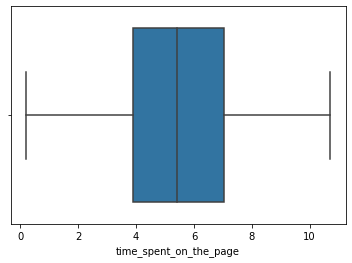

In [10]:
sns.boxplot(data=df, x='time_spent_on_the_page');

Observations: this box plot shows us the analytical details of the time spent on the page. The maximum time is above 10 minutes, the minimum time is a few seconds and the median time is slightly above 5 minutes. 75% of the users in the groups spent less than 7 minutes on the landing page.

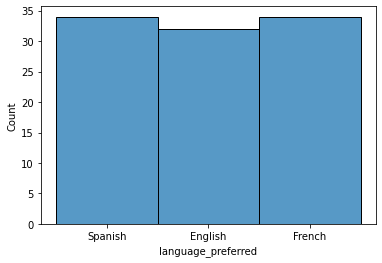

In [11]:
sns.histplot(data=df, x='language_preferred');

Observations: from this histplot, we see that the most preferred languages are Spanish and French, and the least preferred language is English

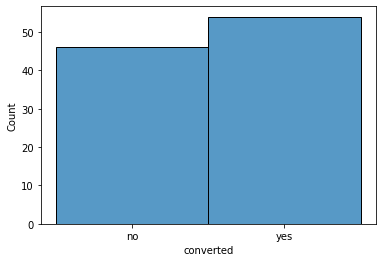

In [12]:
sns.histplot(data=df, x='converted');

Observations: This plot shows us that the number of people converted is greater than the number of people who were not converted during this study

### Bivariate Analysis

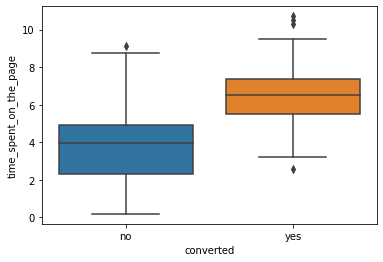

In [13]:
sns.boxplot(data=df, x='converted',y='time_spent_on_the_page');

Observations: From this plot, we can see that the person who spent the lowest time on a landing page was not converted, and the person who spent the most time on a landing page was converted. The median time spent on the landing page for those who were converted is higher than that of those who were not.

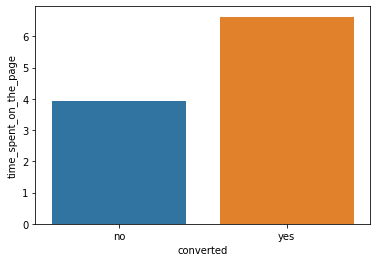

In [14]:
sns.barplot(data=df, x='converted',y='time_spent_on_the_page',ci=False);

Observations: Here, we see that those that were converted, averagely spent more time on the page

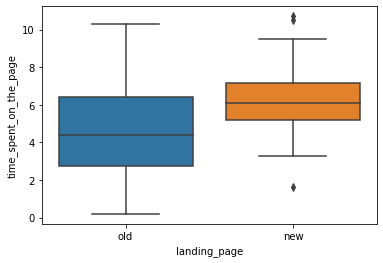

In [15]:
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page');

Observations: From the box plot above, we see that people averagely spent more time on the new landing page than the old one.

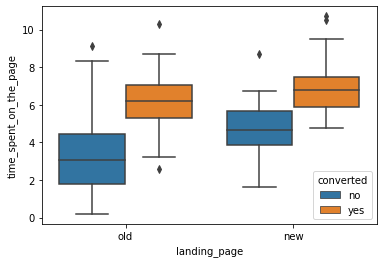

In [16]:
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page',hue='converted');

Observations: from this boxplot, we see that the median time spent by people who were converted via the new landing page is higher than those who were converted by the old one. Also, people spent more time on the new landing page, whether they became converted or not.

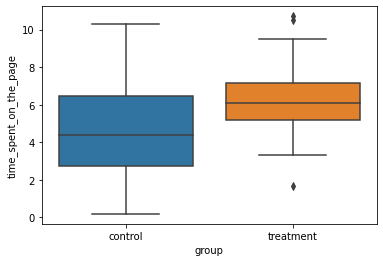

In [17]:
sns.boxplot(data=df, x='group',y='time_spent_on_the_page');

observations: the treatment group sepnt more time on the page. this is expected, seeing as the treatment group represents those who landed on the new page.

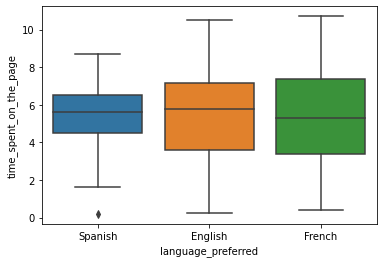

In [18]:
sns.boxplot(data=df, x='language_preferred',y='time_spent_on_the_page');

Observations: the median for the time spent on the page by users who prefer english is highest, followed closely by Spanish and French users. 50% of the spanish and English users spent less than 6 minutes on the page, while 50% of the French users spent about 5 minutes or less.

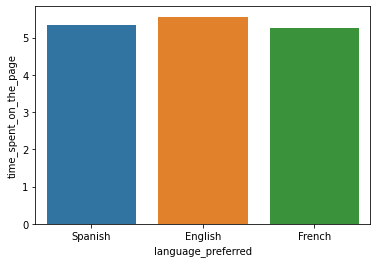

In [19]:
sns.barplot(data=df, x='language_preferred',y='time_spent_on_the_page',ci=False);

Observations: The users with English as the preferred language spent the most time on the page though it had the lowest count of users. 

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

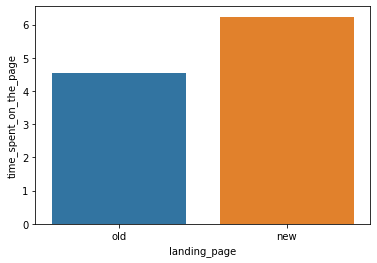

In [20]:
sns.barplot(data=df, x='landing_page',y='time_spent_on_the_page',ci=False);

From visualisation, we see that the time spent on the new landing page is more than the old. we will now see if we can prove this to be right statistically

In [21]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

### Step 1: Define the null and alternate hypotheses

#We will test the null hypothesis:

>$H_0:Nlp<= Elp $
The users spend less or equal time on the new landing page than the existing landing page

against the alternate hypothesis

>$H_a:Nlp>Elp$
The users spend more time on the new landing page than the existing landing page

### Step 2: Select Appropriate test

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent is measured on a continuous scale.
* Normally distributed populations - we can assume a normally distributed population as the number of observations are greater than 30.
* Independent populations - As we are looking at two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.


The appropriate test is 2 sample independent T test

### Step 3: Decide the significance level

The significance level according to the problem statement is  5% 
Therefore alpha=0.05

### Step 4: Collect and prepare data

In [22]:
#We need to find the mean of the time spent on the page of each category of landing pages.
#First, we find the mean of the time spent on the existing landing page and the new landing page
mean_existing=df[['user_id','time_spent_on_the_page','landing_page']][df['landing_page']=='old'].groupby('user_id').sum().mean()
mean_new=df[['user_id','time_spent_on_the_page','landing_page']][df['landing_page']=='new'].groupby('user_id').sum().mean()
print (mean_existing)
print (mean_new)

time_spent_on_the_page    4.5324
dtype: float64
time_spent_on_the_page    6.2232
dtype: float64


Observations: The mean of the time spent on the existing landing page and new landing page is 4.53 minutes 6.22 minutes respectively

In [23]:
#we need to then find the standard deviation for both the old and new landing pages:
std_existing=df[['user_id','time_spent_on_the_page','landing_page']][df['landing_page']=='old'].groupby('user_id').sum().std()
std_new=df[['user_id','time_spent_on_the_page','landing_page']][df['landing_page']=='new'].groupby('user_id').sum().std()
print(std_existing)
print(std_new)

time_spent_on_the_page    2.581975
dtype: float64
time_spent_on_the_page    1.817031
dtype: float64


Observations: The standard deviation of the time spent on the existing landing page and new landing page is 2.58 minutes and  1.82 minutes

### Step 5: Calculate the p-value

In [24]:
#defining the variables for the old and new page
existing_page=df[['user_id','time_spent_on_the_page','landing_page']][df['landing_page']=='old'].groupby('user_id').sum()
new_page=df[['user_id','time_spent_on_the_page','landing_page']][df['landing_page']=='new'].groupby('user_id').sum()

In [25]:
#To find the P-Value:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new_page,existing_page, equal_var = False, alternative = 'greater')
print('The test statistics is', test_stat, 'and the p-value is ', p_value)


The test statistics is [3.78677027] and the p-value is  [0.00013924]


### Step 6: Compare the p-value with $\alpha$

In [26]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:

    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value [0.00013924] is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Based on the above, we can reject the null hypothesis. thus, we have enough evidence to prove that the users spend more time on the new landing page than the existing landing page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

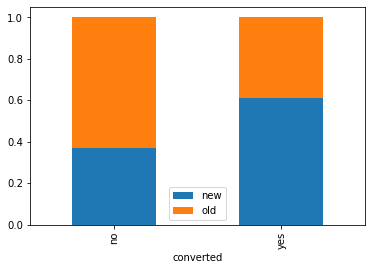

In [27]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

Observations: From the stacked bar plot, We can see that more converts are from the new landing page and we have a few from the old landing page. we will now see if we have enough statistical evidence to prove this.

In [28]:
#we want to see the proportions on a contingency table:
contingency_table = pd.crosstab(df['converted'],df['landing_page'])
contingency_table

landing_page,new,old
converted,,
no,17,29
yes,33,21


𝐻0:𝑝2<=𝑝1 

𝐻𝑎:𝑝2>𝑝1

where p1=proportion for the old landing page
And p2=proportion for the new landing page

Since the formulated hypotheses are concerned with proportions, we can use a test of proportions analyse the hypotheses and draw a conclusion. We will use a Proportions Z test for this problem.

Here, we select α= 0.05 since our significance level is 5%

In [29]:
#preparing the data
# number of old page converts
oldpage_converts=df[df['landing_page']=='old'].converted.value_counts()['yes']
# number of new page converts
newpage_converts = df[df['landing_page']=='new'].converted.value_counts()['yes']

print('The numbers of converts from the old page and converts from the new page are {0} and {1} respectively'.format(oldpage_converts, newpage_converts))

#number of old page users in the data
n_oldpage = df.landing_page.value_counts()['old']

#number of new page users in the data
n_newpage = df.landing_page.value_counts()['new']

print('The total numbers of those in the old landing page and those in the new landing page are {0} and {1} respectively'.format(n_oldpage, n_newpage))

The numbers of converts from the old page and converts from the new page are 21 and 33 respectively
The total numbers of those in the old landing page and those in the new landing page are 50 and 50 respectively


In [30]:
print(f' The proportions of converts in the old landing page and new landing page is {round(21/50,2)}, {round(33/50,2)} respectively')

 The proportions of converts in the old landing page and new landing page is 0.42, 0.66 respectively


The proportions in the sample are different. The proportion for the new page is larger than the old page. we will conduct the ztest to prove the significance.

Based on the above, we  have enough proof to say that the number of converts from the new landing page is different from the old/existing landing page

In [31]:
# finding the p-value using proportion_ztest 
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([newpage_converts,oldpage_converts] , [n_newpage, n_oldpage,], alternative = 'larger')

# print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.008026308204056278


In [32]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


Inference: We have enough evidence to say that the proportion of users who visit the landing page and get converted for the new page is greater than the conversion rate for the old page

## 3. Is the conversion and preferred language are independent or related?

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Conversion rate is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion rate is dependent on preferred language.

### To confirm whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

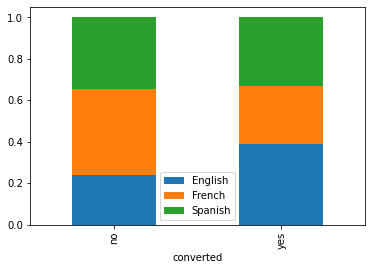

In [33]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

In [34]:
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [35]:
# use chi2_contingency() to find the p-value
# import the required function
from scipy.stats import chi2_contingency
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', pval)

The p-value is 0.2129888748754345


In [36]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


Based on the above, we can say that we have enough evidence to prove that the  Conversion rate is independent of the preferred language.

## 4. Is the time spent on the new page same for the different language users?

In [37]:
# get the different values for language
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

### stating the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent for languages Spanish, French and English respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ the time spent on at least one of the languages  is different from the rest.



language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


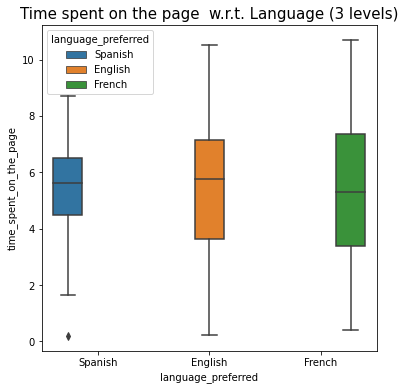

In [38]:
print(df.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df, hue = 'language_preferred')
a.set_title("Time spent on the page  w.r.t. Language (3 levels)", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

###Shapiro-Wilk's test
We will test the null hypothesis

>$H_0:$ time_spent_on_the_page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ time_spent_on_the_page does not follow a normal distribution

In [39]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since p-value of the test is very large, we fail to reject the null hypothesis. Therefore, we can say that the time spent on the page follows a normal distribution

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [40]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['language_preferred']=="Spanish"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="English"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Since the p-value is larger than alpha, we fail to reject the null hypothesis of homogeneity of variances. We can therefpre assume that all the population variances are equal

In [41]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


As the p-value is much more than the significance level, we fail to reject the null hypothesis. therefore, we have enough evidence to prove that the average time spent is the same for the different language user

## Conclusion and Business Recommendations
1. From the above analysis, we can conclude that the design of the new landing page has been able to increase engagement of the users.
2. We can also conclude that the users who use the new landing page are more likely to subscribe than the old landing page. The new page is thus more effecrive in converting to subscribers.
3. We can say that the amount of time spent and consequently, the decision to subscribe or not is independent of the preferred language of the user. 

___